<div style="background: linear-gradient(135deg, #6610f2 0%, #6f42c1 100%); padding: 30px; border-radius: 15px; margin: 20px 0; text-align: center; color: white; box-shadow: 0 8px 32px rgba(0,0,0,0.1);">
    <h1 style="font-size: 2.8em; margin: 0 0 15px 0; font-weight: 700; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">Notebook 4: Predictive Analysis & Machine Learning</h1>
    <h2 style="font-size: 1.6em; margin: 0; font-weight: 400; opacity: 0.9;">Predicting Falcon 9 First Stage Landing Success</h2>
</div>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="400" alt="Skills Network Logo">
    </a>
</p>

# **Space X  Falcon 9 First Stage Landing Prediction**
## Hands on Lab: Complete the Machine Learning Prediction lab
Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.



## Objectives
Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
import os
from io import StringIO
import requests
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [3]:
def plot_confusion_matrix(y_true,y_pred,labels:list,title:str,cmap:str):
    cm = confusion_matrix(y_true,y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.heatmap(cm,annot=True,fmt='d',cmap=cmap,ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    return fig

labels = ['Didn\'t land','Landed']
title = 'Confusion Matrix'
cmap = 'coolwarm'

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL1)
response.raise_for_status()
response.encoding = 'utf-8'
data = response.text
df = pd.read_csv(StringIO(data))
display(df.head())

URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
response2 = requests.get(URL2)
response2.raise_for_status()
X = pd.read_csv(StringIO(response2.text))
display(X.head())

Y = df['Class'].to_numpy()
display(Y)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  1
Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [4]:
X = pd.read_csv(StringIO(response2.text))
display(X.head())

Y = df['Class'].to_numpy()
display(Y)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  2
Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [5]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns.to_list()
categorical_features = X.select_dtypes(include=['object','category']).columns.to_list()
numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[
    ('numerical',numerical_transformer,numerical_features),
    ('categorical',categorical_transformer,categorical_features)
],remainder='passthrough',verbose=False)

## TASK  3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## TASK  4
Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [7]:

pipeline = Pipeline(steps=[('preprocessor',preprocessor),('classifier',LogisticRegression(random_state=42))])
parameters ={'classifier__C':[0.01,0.1,1,2,5,10],
             'classifier__penalty':['l1','l2'],
             'classifier__solver':['lbfgs','liblinear']}
cv = StratifiedKFold(n_splits=5,shuffle=True)
grid_search_model = GridSearchCV(pipeline,parameters,cv=cv,scoring='accuracy',n_jobs=-1)
grid_search_model.fit(X_train,y_train)


c:\Users\shenc\anaconda3\envs\python313_latest\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shenc\anaconda3\envs\python313_latest\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shenc\anaconda3\envs\python313_latest\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\shenc\anaconda3\envs\python313_late

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['lbfgs', 'liblinear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('numerical', ...), ('categorical', ...)]"


## TASK  5
Calculate the accuracy on the test data using the method <code>score</code>:


Best score: 0.83
Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'Block', 'ReusedCount',
                                                   'Orbit_ES-L1', 'Orbit_GEO',
                                                   'Orbit_GTO',

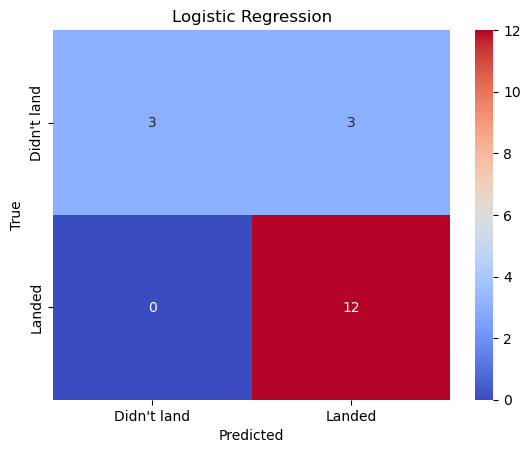

Confusion matrix: [[ 3  3]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



In [8]:
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

def plot_confusion_matrix(y_true,y_pred,labels=None,title=None,cmap=None):
    cm = sklearn_confusion_matrix(y_true,y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.heatmap(cm,annot=True,fmt='d',cmap=cmap,ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    if title:
        ax.set_title(title)
    if labels:
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)
    plt.show()
    return fig

grid_predictions = grid_search_model.predict(X_test)
score = grid_search_model.score(X_test,y_test)
print(f'Best score: {round(score,2)}')   
params = grid_search_model.best_params_
print(f'Best parameters: {params}')
estimator = grid_search_model.best_estimator_
print(f'Best estimator: {estimator}')

plot_confusion_matrix(y_test,grid_predictions,labels=['Didn\'t land','Landed'],title='Logistic Regression',cmap='coolwarm')


lr_confusion_matrix = sklearn_confusion_matrix(y_test,grid_predictions)
print(f'Confusion matrix: {lr_confusion_matrix}')

lr_classificaion_report = classification_report(y_test,grid_predictions)
print(lr_classificaion_report)


## TASK  6
Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.
## TASK  7
Calculate the accuracy on the test data using the method <code>score</code>:


Best score: 0.8333333333333333
Best parameters: {'svc__C': 0.01, 'svc__degree': 2, 'svc__gamma': np.float64(1.0), 'svc__kernel': 'poly'}
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'Block', 'ReusedCount',
                                                   'Orbit_ES-L1', 'Orbit_GEO',
                                                

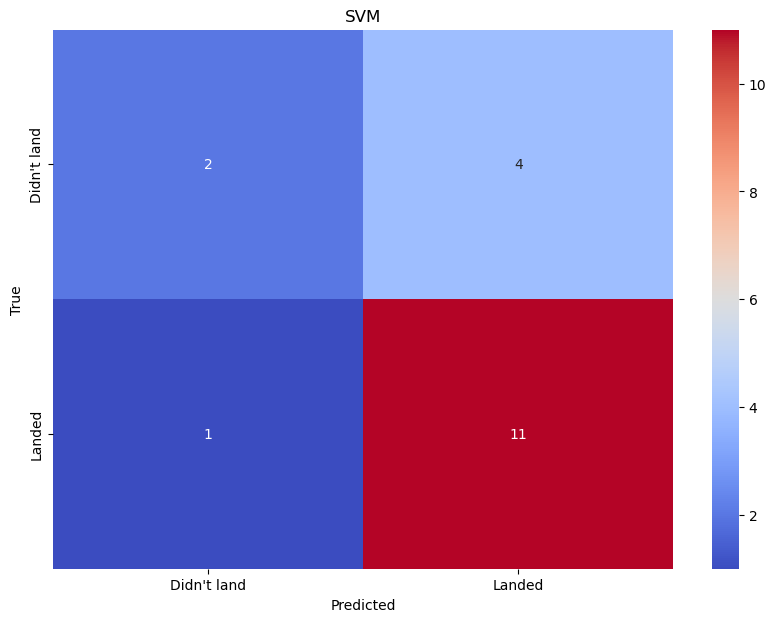

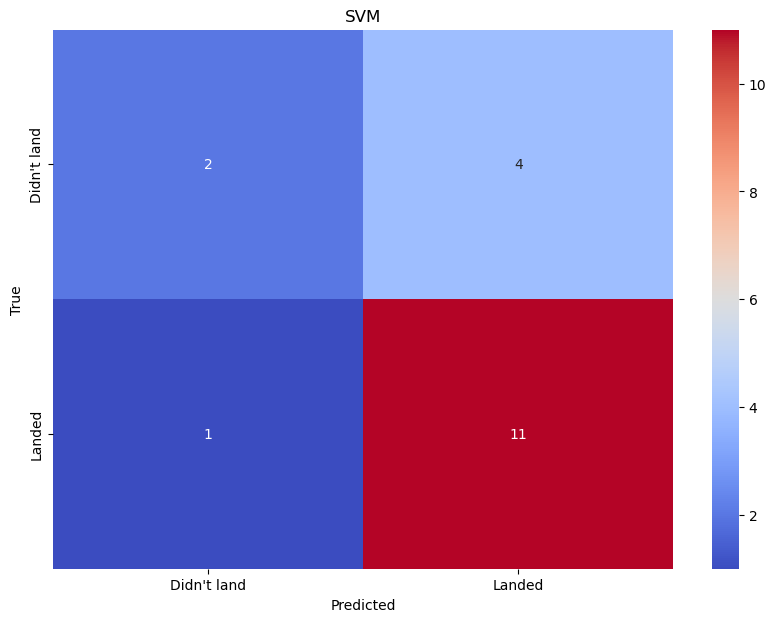

In [9]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('svc',SVC(random_state=42))])
parameters ={'svc__C':[0.01,0.1,1,2,5,10],
             'svc__kernel':['linear','rbf','poly'],
             'svc__gamma':np.logspace(-3,3,5),
             'svc__degree':[2,3,4]}
cv = TimeSeriesSplit(n_splits=5)

grid_search_model2 = GridSearchCV(pipeline,parameters,cv=cv,scoring='accuracy',n_jobs=-1)
grid_search_model2.fit(X_train,y_train)

svm_score = grid_search_model2.best_score_
svm_params = grid_search_model2.best_params_
svm_estimator = grid_search_model2.best_estimator_
print(f'Best score: {svm_score}')
print(f'Best parameters: {svm_params}')
print(f'Best estimator: {svm_estimator}')

def plot_confusion_matrix(y_true,y_pred,labels=None,title=None,cmap=None):
    cm = sklearn_confusion_matrix(y_true,y_pred)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    sns.heatmap(cm,annot=True,fmt='d',cmap=cmap,ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    if title:
        ax.set_title(title)
    if labels:
        ax.xaxis.set_ticklabels(labels)
        ax.yaxis.set_ticklabels(labels)
    plt.show()
    return fig
y_pred = grid_search_model2.predict(X_test)
svm_classificaion_report = classification_report(y_test,y_pred)
print(f'SVM Classification report: {svm_classificaion_report}')
svm_confusion_matrix = sklearn_confusion_matrix(y_test,y_pred)
print(f'SVM Confusion matrix: {svm_confusion_matrix}')
plot_confusion_matrix(y_test,y_pred,labels=['Didn\'t land','Landed'],title='SVM',cmap='coolwarm')



## TASK  8
Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.
## TASK  9
Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Best score: 0.9028571428571428
Best parameters: {'tree__criterion': 'gini', 'tree__max_depth': 4, 'tree__max_features': 'sqrt', 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2, 'tree__splitter': 'best'}
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'Block', 'ReusedCount',
                                                   

c:\Users\shenc\anaconda3\envs\python313_latest\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
880 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shenc\anaconda3\envs\python313_latest\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shenc\anaconda3\envs\python313_latest\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\shenc\anaconda3\envs\python313_

,Predicted 0,Predicted 1
Actual 0,4,2
Actual 1,1,11


Tree Classification report:               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.85      0.92      0.88        12

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18



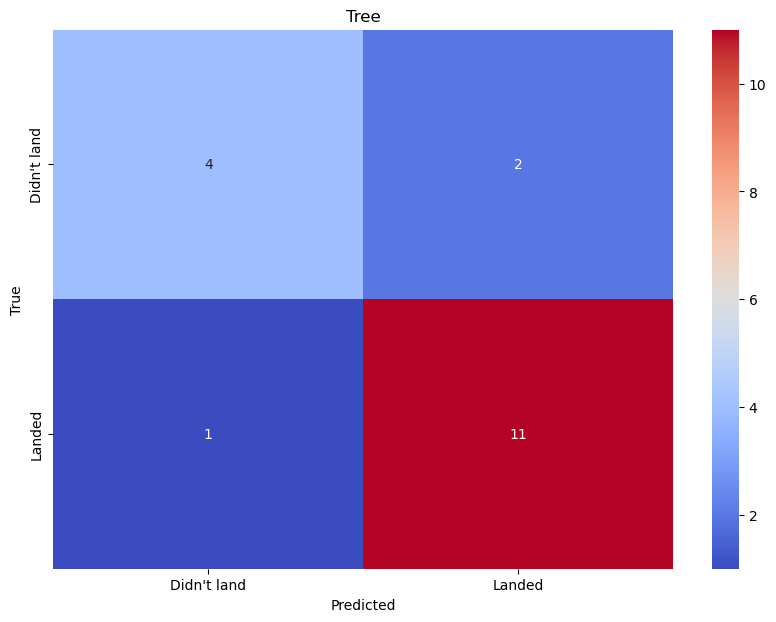

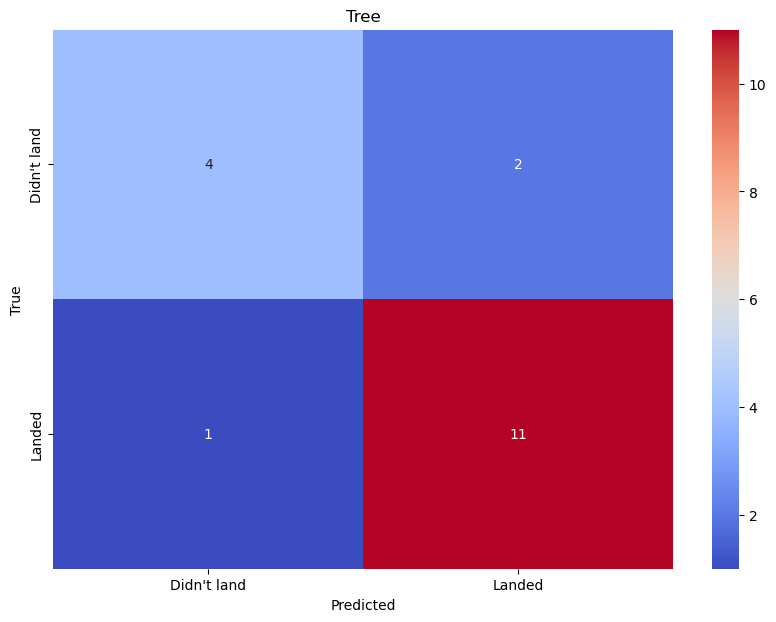

In [10]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('tree',DecisionTreeClassifier(random_state=42))])
parameters = {'tree__criterion': ['gini', 'entropy'],
     'tree__splitter': ['best', 'random'],
     'tree__max_depth': [2*n for n in range(1,10)],
     'tree__max_features': ['auto', 'sqrt'],
     'tree__min_samples_leaf': [1, 2, 4],
     'tree__min_samples_split': [2, 5, 10]}

cv = StratifiedKFold(n_splits=5,shuffle=True)
grid_search_model3 = GridSearchCV(pipeline,parameters,cv=cv,scoring='accuracy',n_jobs=-1)
grid_search_model3.fit(X_train,y_train)
tree_score = grid_search_model3.best_score_
tree_params = grid_search_model3.best_params_
tree_estimator = grid_search_model3.best_estimator_
print(f'Best score: {tree_score}')
print(f'Best parameters: {tree_params}')
print(f'Best estimator: {tree_estimator}')

y_pred = grid_search_model3.predict(X_test)
conf_matrix = sklearn_confusion_matrix(y_test,y_pred)
print(f'Tree Confusion matrix')
display(pd.DataFrame(conf_matrix,columns=["Predicted 0","Predicted 1"],index=["Actual 0","Actual 1"]))
print(f'Tree Classification report: {classification_report(y_test,y_pred)}')
plot_confusion_matrix(y_test,y_pred,labels=['Didn\'t land','Landed'],title='Tree',cmap='coolwarm')




## TASK  10
Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.
## TASK  11
Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Best score: 0.8628571428571428
Best parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 5, 'knn__p': 1}
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'Block', 'ReusedCount',
                                                   'Orbit_ES-L1', 'Orbit_GEO',
                                                   'Orbit_GTO', 'Orbit_HEO

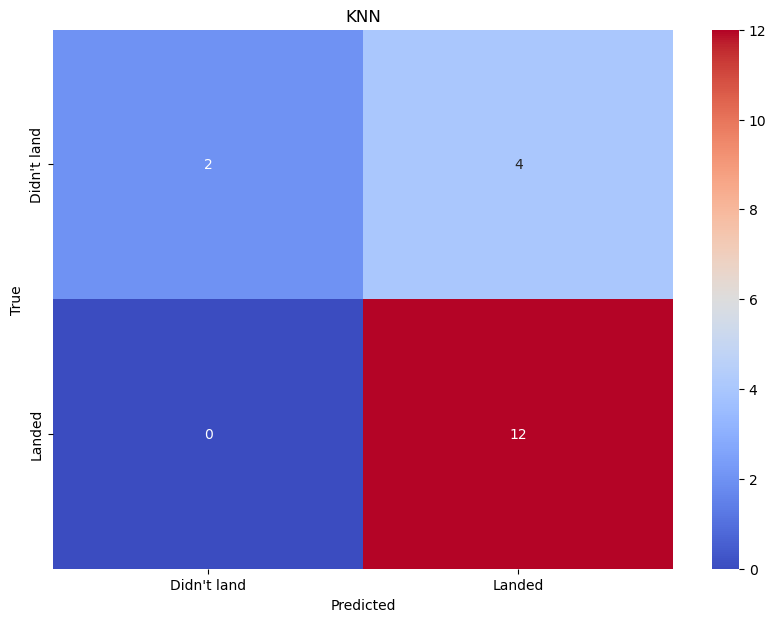

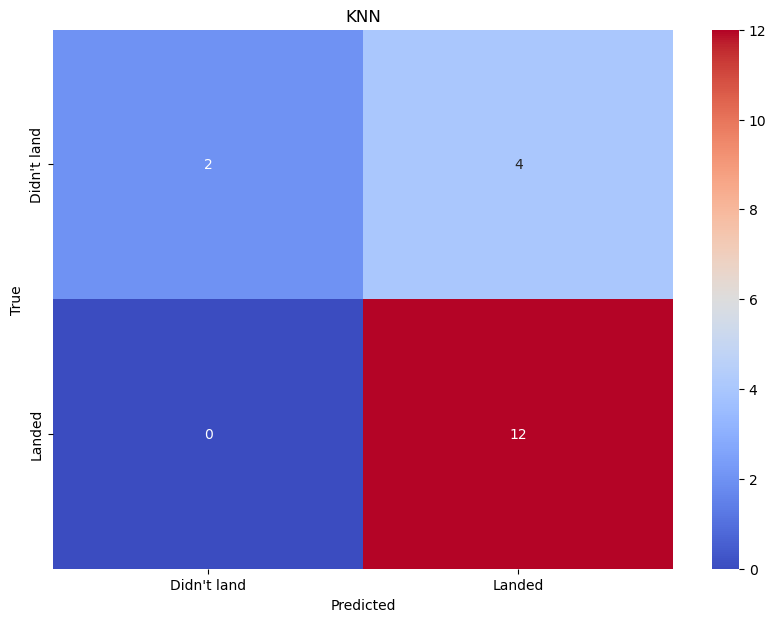

In [11]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),('knn',KNeighborsClassifier())])

parameters = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'knn__p': [1,2]}

cv = StratifiedKFold(n_splits=5,shuffle=True)
grid_search_model4 = GridSearchCV(pipeline,parameters,cv=cv,scoring='accuracy',n_jobs=-1)
grid_search_model4.fit(X_train,y_train)

knn_score = grid_search_model4.best_score_
knn_params = grid_search_model4.best_params_
knn_estimator = grid_search_model4.best_estimator_
print(f'Best score: {knn_score}')
print(f'Best parameters: {knn_params}')
print(f'Best estimator: {knn_estimator}')

y_pred = grid_search_model4.predict(X_test) 
knn_classificaion_report = classification_report(y_test,y_pred)
print(f'KNN Classification report: {knn_classificaion_report}')
knn_confusion_matrix = sklearn_confusion_matrix(y_test,y_pred)
print(f'KNN Confusion matrix: {knn_confusion_matrix}')
plot_confusion_matrix(y_test,y_pred,labels=['Didn\'t land','Landed'],title='KNN',cmap='coolwarm')



## TASK  12
Find the method performs best:


KNN score: 0.8628571428571428
SVM score: 0.8333333333333333
Tree score: 0.9028571428571428
Logistic score: 0.8457142857142858
Score dictionary: [('Tree', np.float64(0.9028571428571428)), ('KNN', np.float64(0.8628571428571428)), ('Logistic', np.float64(0.8457142857142858)), ('SVM', np.float64(0.8333333333333333))]


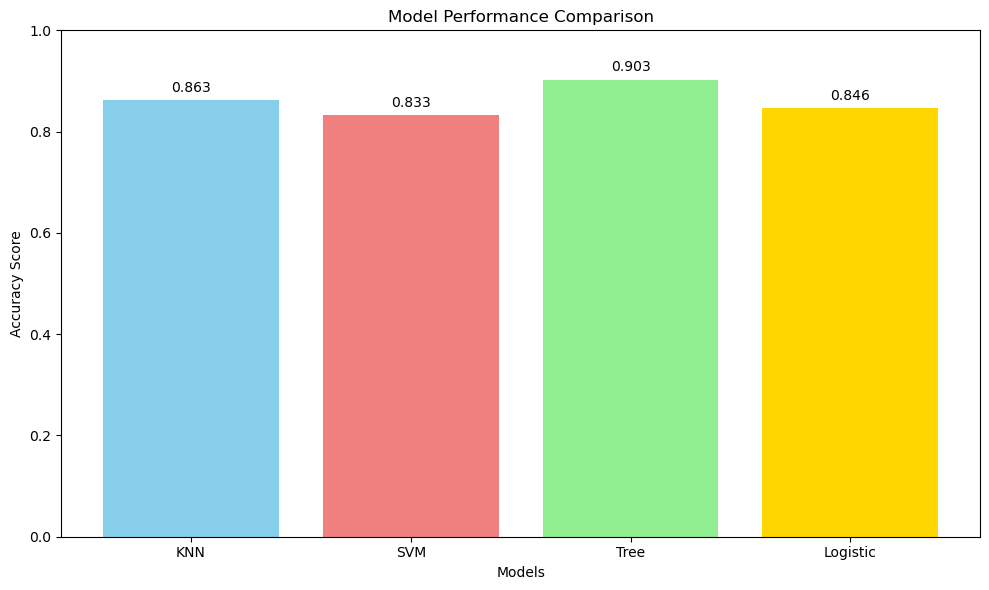

In [12]:
print(f'KNN score: {grid_search_model4.best_score_}')
print(f'SVM score: {grid_search_model2.best_score_}')
print(f'Tree score: {grid_search_model3.best_score_}')
print(f'Logistic score: {grid_search_model.best_score_}')
score_dict = {'KNN':grid_search_model4.best_score_,
              'SVM':grid_search_model2.best_score_,
              'Tree':grid_search_model3.best_score_,
              'Logistic':grid_search_model.best_score_}
score_dict_sorted = sorted(score_dict.items(),key=lambda x : x[1],reverse=True)
print(f'Score dictionary: {score_dict_sorted}')

# Create bar plot
plt.figure(figsize=(10, 6))
models = list(score_dict.keys())
scores = list(score_dict.values())
plt.bar(models, scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()
